# Datos espaciales con Basemap

![SST MODIS](SST_MODIS.jpg)

En este notebook vamos a ver como representar datos espaciales en mapas.     
Existen 2 paquetes que functionan de manera similar:
1. [`cartopy`](https://scitools.org.uk/cartopy/)
2. [`Basemap`](https://matplotlib.org/basemap/stable/).

Aquí nos centraremos sobre la utilización de `Basemap`, mientras `cartopy` será presentado en [datos_espaciales_basemap](datos_espaciales_cartopy.ipynb)

## Instalación
Como todos los paquetes de Python, existen varias maneras de instalar `cartopy` y `Basemap`. Lo importante es no mezclar los métodos de instalación. Por ejemplo si paquetes han sido instalado a través de 
```bash
pip install nombre_del_paquete
```
es preferible seguir con este metodo.

### Basemap
```bash
pip install basemap
```
Si el comando ha funcionado, se obtendra un mensaje terminando por:
```bash
...
Installing collected packages: basemap-data, Basemap
Successfully installed Basemap-1.4.1 basemap-data-1.3.2
```

In [1]:
import sys
!{sys.executable} -m pip install Basemap

Defaulting to user installation because normal site-packages is not writeable


## Creación de una proyección
La primera etapa consiste en la creación de una proyección, o para ser más preciso: un _Sistema de referencia de coordenadas_ (CRS in inglés: _Coordinate reference system_).

La lista de CRS se encuentra en https://matplotlib.org/basemap/stable/users/mapsetup.html. En este ejemplo vamos a trabajar con una proyección de Miller.

In [3]:
import os
import netCDF4
from urllib.request import urlretrieve
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
m = Basemap(projection='mill')

Se puede visualizar directamente el objeto creado si añadimos la línea de costa:

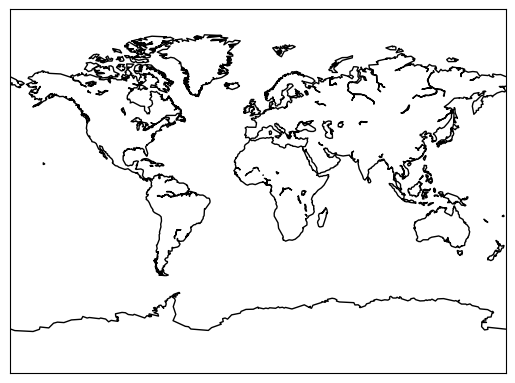

In [6]:
m.drawcoastlines()

### Selección de una zona de interés
Definimos una variable `domain` que contiene los limites, en el orden (oeste, este, sur, norte).

In [7]:
domain = (-77, -52, -56., -40.)
m = Basemap(projection='mill', llcrnrlon=domain[0], llcrnrlat=domain[2], 
            urcrnrlon=domain[1], urcrnrlat=domain[3])
m.drawcoastlines()

Explicaremos como cambiar la resolución de la costa en los pasos siguientes.

## Datos 2D
La figura anterior no contiene nada, así que vamos a añadir un campo de temperatura del mar.    
El fichero se puede obtener desde la web de [Ocean Color](https://oceancolor.gsfc.nasa.gov/l3/). Es necesario tener una cuenta para bajar ficheros, así que dejamos un enlace para bajar un fichero ejemplo.

Contienen la temperatura del mar (sensor MODIS, satélite Terra), promediado sobre el periodo 2000-2024.

In [ ]:
sstfile = "SST_MODIS.nc"
if not(os.path.exists(sstfile)):
    urlretrieve("https://dox.uliege.be/index.php/s/ESRPp1TIRDk28Fs/download", sstfile)

In [ ]:
with netCDF4.Dataset(sstfile, "r") as nc:
    lon = nc.variables["lon"][:]
    lat = nc.variables["lat"][:]
    SST = nc.variables["sst4"][:]

### Figura simple
Para visualizar el contenido, utilizamos `pcolormesh`.

In [ ]:
plt.pcolormesh(lon, lat, SST)

### Mapa

Preparamos una figura básica para comprobar que todo funciona correctamente.

__Importante:__ el argumento `transform=...` en la funcción `pcolormesh`, que indica cual es el sistema de coordenadas de los datos que queremos representar (la SST en este caso). Más información en la web de `cartopy`: https://scitools.org.uk/cartopy/docs/latest/tutorials/understanding_transform.html

In [ ]:
fig = plt.figure()
ax = plt.subplot(111, projection=mainproj)
ax.set_extent(domain)
pcm = ax.pcolormesh(lon, lat, SST, transform=ccrs.PlateCarree())
cb = plt.colorbar(pcm)
plt.show()

## Decoración del mapa
El mapa anterior se puede mejorar en muchos aspectos:
- añadir cuadrícula de coordenadas en los ejes,
- añadir una linea de costa,
- adaptaro el rango de color.

### Cuadrícula
Utilizamos la function `gridlines`, que permite cambiar el aspecto de las líneas.     

In [ ]:
fig = plt.figure()
ax = plt.subplot(111, projection=mainproj)
ax.set_extent(domain)
gl = ax.gridlines(draw_labels=True, linewidth=.5, color='.25', linestyle='-.', zorder=2)
plt.show()

A veces preferimos quitar los simbolos de coordenadas por la derecha y arriba, eso se hace a través de las propiedades objeto `gl`:

In [ ]:
fig = plt.figure()
ax = plt.subplot(111, projection=mainproj)
ax.set_extent(domain)
gl = ax.gridlines(draw_labels=True, linewidth=.5, color='.25', linestyle='-.', zorder=2)
gl.top_labels = False
gl.right_labels = False
plt.show()

### Linea de costa
Cartopy permite el uso de la costa del _Global Self-consistent, Hierarchical, High-resolution Geography Database_ ([GSHHG](https://www.soest.hawaii.edu/pwessel/gshhg/)), que tiene 5 resolutiones espaciales disponibles:
- "c" (crude) = crudo
- "l" (low) = bajo
- "i" (intermediate) = intermedio
- "h" (high) = alto
- "f" (full) = completo.

La elección de resolución depende del tamaño de la zona de interés: para un mapa global, no es necesario trabajar con la resolución _full_. 

La figura siguiente ilustra las diferencias entre casa resolución. La figura puede tardar uno segundos en generarse, ya que se tiene que preparar la linea de costa de alta resolucón para la zona de estudio.

In [ ]:
import cartopy.feature as cfeature

fig = plt.figure(figsize=(10, 5))
for iii, res in enumerate(["c", "l", "i", "h", "f"]):
    ax = plt.subplot(2, 3, iii + 1, projection=mainproj)
    coast = cfeature.GSHHSFeature(scale=res)
    ax.add_feature(coast, linewidth=0.5)
    ax.set_extent(domain)
    ax.set_title(res)

plt.suptitle("GSHHS coastline")
plt.show()
plt.close()

Vemos que en la primera sub-figura, la resolución no es suficiente, mientras que en las otras, tenemos un nivel de detalle suficiente. 

Para ilustrar mejor estas diferencias, nos centramos sobre una zona más redudica.

In [ ]:
smalldomain = (-91.8, -89.1, -1.6, 0.75)
fig = plt.figure(figsize=(10, 5))
for iii, res in enumerate(["c", "l", "i", "h", "f"]):
    ax = plt.subplot(2, 3, iii + 1, projection=mainproj)
    coast = cfeature.GSHHSFeature(scale=res)
    ax.add_feature(coast, linewidth=0.5)
    ax.set_extent(smalldomain)
    ax.set_title(res)
plt.suptitle("GSHHS coastline")
plt.show()
plt.close()

Finalmente, para regiones muy limitada, es necesario trabajar con la resolución completa de GSHHS.

In [ ]:
verysmalldomain = (-90.57, -90.14, -0.8, -0.337)
fig = plt.figure(figsize=(10, 5))
for iii, res in enumerate(["c", "l", "i", "h", "f"]):
    ax = plt.subplot(2, 3, iii + 1, projection=mainproj)
    coast = cfeature.GSHHSFeature(scale=res)
    ax.add_feature(coast, linewidth=0.5)
    ax.set_extent(verysmalldomain)
    ax.set_title(res)
plt.suptitle("GSHHS coastline")
plt.show()
plt.close()

### Rango de color
No es una operación relacionada con el mapa sino con la función `pcolormesh`. 

In [ ]:
fig = plt.figure()
ax = plt.subplot(111, projection=mainproj)
ax.set_extent(domain)
pcm = ax.pcolormesh(lon, lat, SST, transform=ccrs.PlateCarree(), vmin=4., vmax=14., 
                    cmap=plt.cm.RdYlBu_r)
cb = plt.colorbar(pcm, extend="both")
cb.set_label("SST (°C)", rotation=0, ha="left")
plt.show()

## Figura final
Combinando las etapas anteriores.

In [ ]:
fig = plt.figure()
ax = plt.subplot(111, projection=mainproj)
ax.set_extent(domain)
ax.set_title("Temperatura de la superficie del mar\nMODIS Terra (2000-2024)")
pcm = ax.pcolormesh(lon, lat, SST, transform=ccrs.PlateCarree(), vmin=4., vmax=14., 
                    cmap=plt.cm.RdYlBu_r)
coast = cfeature.GSHHSFeature(scale="l")
ax.add_feature(coast, linewidth=0.25, facecolor='.65')

gl = ax.gridlines(draw_labels=True, linewidth=.5, color='.25', linestyle='-.', zorder=2)
gl.top_labels = False
gl.right_labels = False

cb = plt.colorbar(pcm, extend="both")
cb.set_label("SST (°C)", rotation=0, ha="left")

## Ejercicios
1. Cambiar la zona de interés (dentro de la zona de figura). Adaptar el rango de valores de temperatura.
2. Cambiar el sistema de coordenadas. 
3. Añadir las fronteras y los ríos.